In [60]:
import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [61]:
# load the data
train_df = pd.read_csv('./california_housing_train.csv')
test_df = pd.read_csv('./california_housing_test.csv')


In [62]:
# scale the values 
scale_factor = 1000.0
train_df['median_house_value'] /= scale_factor
test_df['median_house_value'] /= scale_factor


In [63]:
# build the model
def build_model(learning_rate):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))
    model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=learning_rate),
                 loss='mean_squared_error',
                 metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

def train_model(model, df, feature, label, my_epochs,
               my_batch_size=None, my_validation_split=0.1):
    history = model.fit(x=df[feature], y=df[label],
                        batch_size=my_batch_size,
                        epochs=my_epochs,
                        validation_split=my_validation_split)
    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]
    print(str(trained_weight) + "->" + str(trained_bias))
    
    epochs = history.epoch
    
    hist = pd.DataFrame(history.history)
    rmse = hist['root_mean_squared_error']
    return epochs, rmse, history.history

print('Defined the build_model and train_model functions')

Defined the build_model and train_model functions


In [64]:
def plot_the_loss(epochs, mae_training, mae_validation):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Root Mean Squared Error')
    
    plt.plot(epochs[1:], mae_training[1:], label='Training loss')
    plt.plot(epochs[1:], mae_validation[1:], label='Validation loss')
    plt.legend()
    
    merged_mae_lists = mae_training[1:] + mae_validation[1:]
    highest_loss = max(merged_mae_lists)
    lowest_loss = min(merged_mae_lists)
    delta = highest_loss - lowest_loss
    
    top_y_axis = highest_loss + (delta * 0.05)
    bottom_y_axis = lowest_loss - (delta * 0.05)
    
    plt.ylim([bottom_y_axis, top_y_axis])
    plt.show()
    
print("define the plot function")

define the plot function


Epoch 1/30
136/136 [==============================] - 1s 2ms/step - loss: 49021.0664 - root_mean_squared_error: 221.4070 - val_loss: 73777.9766 - val_root_mean_squared_error: 271.6210
Epoch 2/30
136/136 [==============================] - 0s 1ms/step - loss: 48733.5938 - root_mean_squared_error: 220.7569 - val_loss: 73392.6562 - val_root_mean_squared_error: 270.9108
Epoch 3/30
136/136 [==============================] - 0s 1ms/step - loss: 48447.5625 - root_mean_squared_error: 220.1081 - val_loss: 73008.0078 - val_root_mean_squared_error: 270.1999
Epoch 4/30
136/136 [==============================] - 0s 1ms/step - loss: 48161.6836 - root_mean_squared_error: 219.4577 - val_loss: 72622.7500 - val_root_mean_squared_error: 269.4861
Epoch 5/30
136/136 [==============================] - 0s 1ms/step - loss: 47878.2148 - root_mean_squared_error: 218.8109 - val_loss: 72241.6250 - val_root_mean_squared_error: 268.7780
Epoch 6/30
136/136 [==============================] - 0s 1ms/step - loss: 47594.

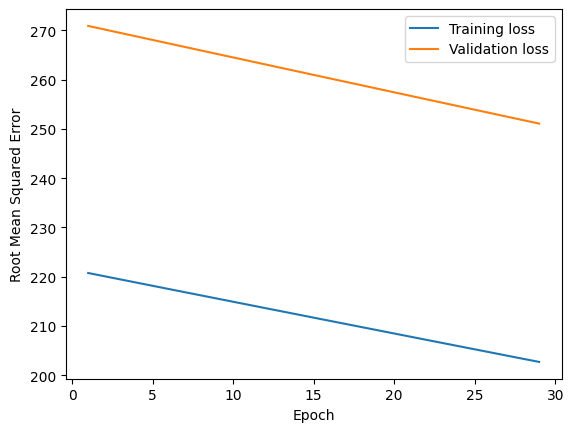

In [65]:
learning_rate = 0.08
epochs = 30
batch_size = 100

validation_split = 0.2

my_feature = 'median_income'
my_label = 'median_house_value'

my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, train_df, my_feature,
                                    my_label, epochs, batch_size,
                                    validation_split)
plot_the_loss(epochs, history["root_mean_squared_error"],
              history['val_root_mean_squared_error'])
